In [1]:
# Import necessary libraries and modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

In [2]:
# Import dataset
fake_news = pd.read_csv("Fake.csv")
true_news = pd.read_csv("True.csv")

In [3]:
# Display first few rows of fake dataset
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
# Display first few rows of true dataset
true_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
# Assign value 
fake_news["class"] = 0
true_news["class"] = 1

In [6]:
# Display shape
fake_news.shape, true_news.shape

((23481, 5), (21417, 5))

In [7]:
# For manual testing removing last 12 rows
fake_news_maul_test = fake_news.tail(12)
for i in range(23480,23468,-1):
    fake_news.drop([i], axis = 0, inplace = True)
    
true_news_maul_test = true_news.tail(12)
for i in range(21416,21404,-1):
    true_news.drop([i], axis=0, inplace = True)

In [8]:
# Display new shape
fake_news.shape, true_news.shape

((23469, 5), (21405, 5))

In [9]:
# Assign value 
fake_news_maul_test["class"] = 0
true_news_maul_test["class"] = 1

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24192\4187826295.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_news_maul_test["class"] = 0
C:\Users\ASUS\AppData\Local\Temp\ipykernel_24192\4187826295.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true_news_maul_test["class"] = 1


In [10]:
# First 12 rows of fake news dataset for manual testing 
fake_news_maul_test.head(12)

,title,text,subject,date,class
23469,BOILER ROOM: As the Frogs Slowly Boil – EP #40,Tune in to the Alternate Current Radio Network...,Middle-east,"January 20, 2016",0
23470,Arizona Rancher Protesting in Oregon is Target...,RTOne of the most visible members of the armed...,Middle-east,"January 20, 2016",0
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0


In [11]:
# Create new Dataframe and save it as a CSV file
manual_test = pd.concat([fake_news_maul_test,true_news_maul_test], axis = 0)
manual_test.to_csv("manual_test_output.csv")

In [12]:
# Merging fake and true dataset and displaying first 12 rows
merge = pd.concat([fake_news, true_news], axis=0)
merge.head(12)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [13]:
# Display columns
merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [14]:
# Removing unwanted columns
new_data = merge.drop(["title", "subject","date"], axis =1)

In [15]:
# Detecting weather there are any empty data
new_data.isnull().sum()

text     0
class    0
dtype: int64

In [16]:
# Display columns
new_data.columns

Index(['text', 'class'], dtype='object')

## Random Shuffling the dataframe

In [17]:
# Shuffle the rows
new_data = new_data.sample(frac = 1) #'frac=1' indicating that all rows should be included

In [18]:
# Display first few rows
new_data.head()

,text,class
18512,A man disguised himself in a burka in order to...,0
3014,WASHINGTON (Reuters) - U.S. lawmakers said on ...,1
20851,PARIS (Reuters) - President Emmanuel Macron wa...,1
6042,WASHINGTON (Reuters) - President Donald Trump ...,1
17740,PARIS (Reuters) - President Emmanuel Macron ca...,1


In [19]:
# Drop the old index column, making the index start from 0.
new_data.reset_index(inplace = True)
new_data.drop(["index"], axis =1, inplace = True)

In [20]:
new_data.columns

Index(['text', 'class'], dtype='object')

In [21]:
new_data.head()

,text,class
0,A man disguised himself in a burka in order to...,0
1,WASHINGTON (Reuters) - U.S. lawmakers said on ...,1
2,PARIS (Reuters) - President Emmanuel Macron wa...,1
3,WASHINGTON (Reuters) - President Donald Trump ...,1
4,PARIS (Reuters) - President Emmanuel Macron ca...,1


In [22]:
# Take a word as input, performs various text preprocessing steps using regular expressions
def newscheck(word):
    word = word.lower()
    word = re.sub('\[.*?\]', '', word)
    word = re.sub("\\W"," ",word) 
    word = re.sub('https?://\S+|www\.\S+', '', word)
    word = re.sub('<.*?>+', '', word)
    word = re.sub('[%s]' % re.escape(string.punctuation), '', word)
    word = re.sub('\n', '', word)
    word = re.sub('\w*\d\w*', '', word)    
    return word

In [23]:
#applying the function to text column
new_data["text"] = new_data["text"].apply(newscheck)

In [24]:
# assign text column as x and class column as y
x = new_data["text"]
y = new_data["class"]

## Splitting Training and Testing

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [26]:
# Convert text to vectors
from sklearn.feature_extraction.text import TfidfVectorizer
vector_convert = TfidfVectorizer()
xv_train = vector_convert.fit_transform(x_train)
xv_test = vector_convert.transform(x_test)

## Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

logic_re = LogisticRegression()
logic_re.fit(xv_train, y_train)
pred_logic_re=logic_re.predict(xv_test)
logic_re.score(xv_test, y_test)

0.9859167483732953

classification_report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5895
           1       0.98      0.99      0.99      5324

    accuracy                           0.99     11219
   macro avg       0.99      0.99      0.99     11219
weighted avg       0.99      0.99      0.99     11219



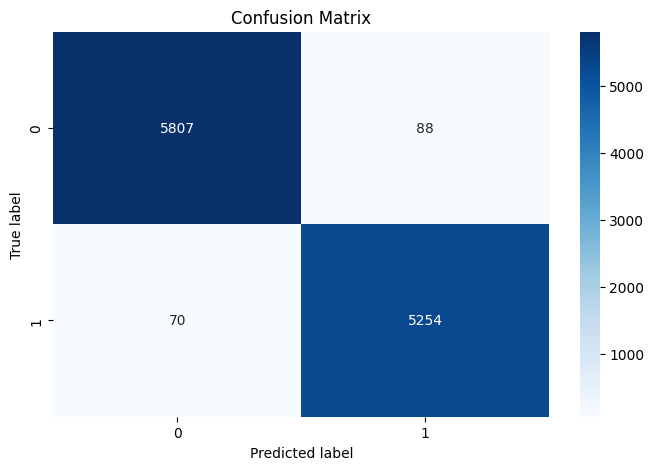

In [28]:
from sklearn.metrics import confusion_matrix, classification_report
print("classification_report")
print(classification_report(y_test, pred_logic_re))
cm = confusion_matrix(y_test, pred_logic_re) # compute confusion matrix
# create heatmap
plt.rcParams["figure.figsize"] = (8,5)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier

rand_fc = RandomForestClassifier(random_state=0)
rand_fc.fit(xv_train, y_train)
pred_rand_fc = rand_fc.predict(xv_test)
rand_fc.score(xv_test, y_test)

0.9877885729565915

classification_report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5895
           1       0.99      0.98      0.99      5324

    accuracy                           0.99     11219
   macro avg       0.99      0.99      0.99     11219
weighted avg       0.99      0.99      0.99     11219



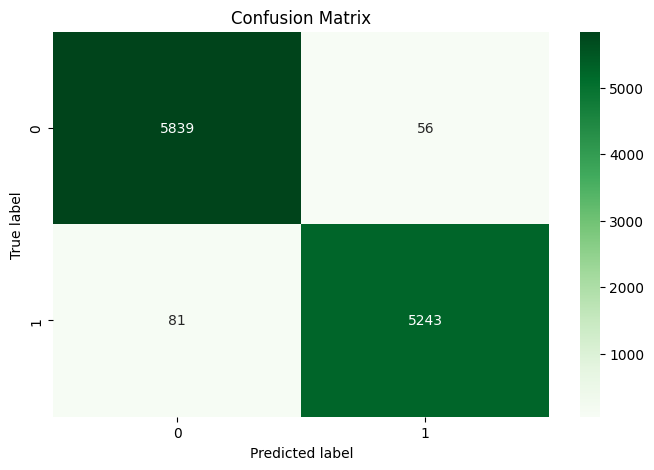

In [30]:
from sklearn.metrics import confusion_matrix, classification_report
print("classification_report")
print(classification_report(y_test, pred_rand_fc))
cm = confusion_matrix(y_test, pred_rand_fc) # compute confusion matrix
# create heatmap
plt.rcParams["figure.figsize"] = (8,5)
sns.heatmap(cm, annot=True, cmap='Greens', fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Gradient Boosting Classifier

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost = GradientBoostingClassifier(random_state=0)
grad_boost.fit(xv_train, y_train)
pred_grad_boost = grad_boost.predict(xv_test)
grad_boost.score(xv_test, y_test)

0.9960780818254746

classification_report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5895
           1       0.99      1.00      1.00      5324

    accuracy                           1.00     11219
   macro avg       1.00      1.00      1.00     11219
weighted avg       1.00      1.00      1.00     11219



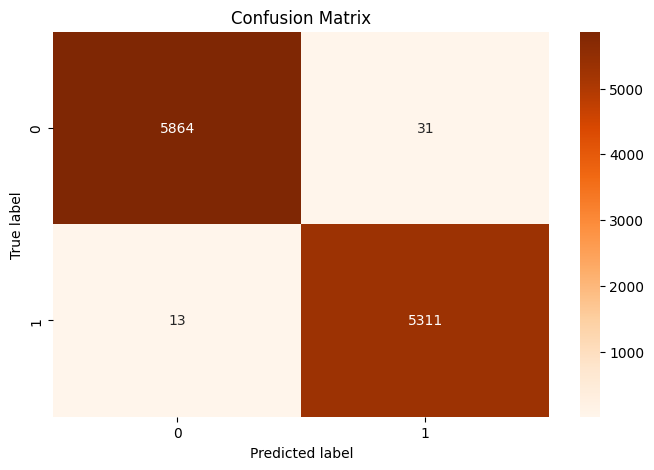

In [32]:
from sklearn.metrics import confusion_matrix, classification_report
print("classification_report")
print(classification_report(y_test, pred_grad_boost))
cm = confusion_matrix(y_test, pred_grad_boost) # compute confusion matrix
# create heatmap
plt.rcParams["figure.figsize"] = (8,5)
sns.heatmap(cm, annot=True, cmap='Oranges', fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Decision Tree Classification

In [33]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()
dec_tree.fit(xv_train, y_train)
pred_dec_tree = dec_tree.predict(xv_test)
dec_tree.score(xv_test, y_test)

0.9959889473215081

classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5895
           1       1.00      1.00      1.00      5324

    accuracy                           1.00     11219
   macro avg       1.00      1.00      1.00     11219
weighted avg       1.00      1.00      1.00     11219



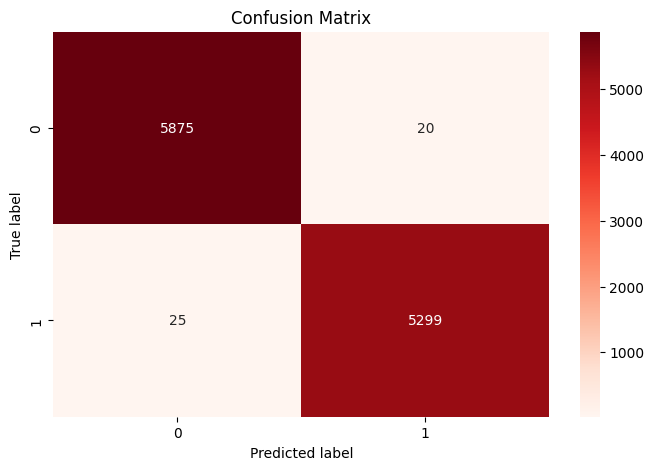

In [34]:
from sklearn.metrics import confusion_matrix, classification_report
print("classification_report")
print(classification_report(y_test, pred_dec_tree))
cm = confusion_matrix(y_test, pred_dec_tree) # compute confusion matrix
# create heatmap
plt.rcParams["figure.figsize"] = (8,5)
sns.heatmap(cm, annot=True, cmap='Reds', fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Model Testing

In [35]:
def detection(i):
    # Convert the prediction label to corresponding class name
    if i == 0:
        return "Fake News"
    elif i == 1:
        return "Real News"
    
def testing(news):
    # Prepare the test data
    test_news = {"text":[news]}
    test_df_news = pd.DataFrame(test_news)
    test_df_news["text"] = test_df_news["text"].apply(newscheck) 
    test_x_news = test_df_news["text"]
    test_xv_news = vector_convert.transform(test_x_news)
    
    # Make predictions using different models
    pred_lr = logic_re.predict(test_xv_news)
    pred_rfc = rand_fc.predict(test_xv_news)
    pred_gbc = grad_boost.predict(test_xv_news)
    pred_dt = dec_tree.predict(test_xv_news)

    return {
        "Logistic Regression": detection(pred_lr[0]),
        "Random Forest": detection(pred_rfc[0]),
        "Gradient Boosting": detection(pred_gbc[0]),
        "Decision Tree": detection(pred_dt[0])
    } 

## Testing from true news dataset

In [36]:
news = input("Enter the news article: ") # Get user input for the news article
predictions = testing(news) # Get predictions

# Print predictions
print("\nPredictions:")
for model, prediction in predictions.items():
    print(model + ":", prediction)

Enter the news article: The following statementsÂ were posted to the verified Twitter accounts of U.S. President Donald Trump, @realDonaldTrump and @POTUS.  The opinions expressed are his own.Â Reuters has not edited the statements or confirmed their accuracy.  @realDonaldTrump : - Based on the fact that the very unfair and unpopular Individual Mandate has been terminated as part of our Tax Cut Bill, which essentially Repeals (over time) ObamaCare, the Democrats & Republicans will eventually come together and develop a great new HealthCare plan! [0658 EST] - WOW, @foxandfrlends â€œDossier is bogus. Clinton Campaign, DNC funded Dossier. FBI CANNOT (after all of this time) VERIFY CLAIMS IN DOSSIER OF RUSSIA/TRUMP COLLUSION. FBI TAINTED.â€ And they used this Crooked Hillary pile of garbage as the basis for going after the Trump Campaign! [0824 EST] - All signs are that business is looking really good for next year, only to be helped further by our Tax Cut Bill. Will be a great year for C

## Testing from fake news dataset

In [37]:
news = input("Enter the news article: ") # Get user input for the news article
predictions = testing(news) # Get predictions

# Print predictions
print("\nPredictions:")
for model, prediction in predictions.items():
    print(model + ":", prediction)

Enter the news article: Fox News has decided to cancel certain ads on their network, completing their transition from a conservative network into a safe space for their fragile Trump fans, and after Trump himself threw a livid fit. A series of ads by political activist Tom Steyer, which call for Trump s impeachment, has been pulled because of the reaction to it from their viewers. Seriously: Due to the strong negative reaction to their ad by our viewers, we could not in good conscience take their money. Why, because their viewers will abandon the network if they show any signs of trying to be balanced? Of course, Fox News is a private entity and is allowed to do this, but the question remains: Is it censorship if they did so because of pressure from Trump? The unhinged presidential impostor did go on Twitter to call Steyer  wacky & totally unhinged  when the  Impeach Trump  campaign was first launched in late October. That may well have put pressure on Fox to pull it.Wacky & totally un

## Testing Real News taken from BBC News

In [44]:
news = input("Enter the news article: ") # Get user input for the news article
predictions = testing(news) # Get predictions

# Print predictions
print("\nPredictions:")
for model, prediction in predictions.items():
    print(model + ":", prediction)

Enter the news article: LONDON (Reuters) - The government has ditched its plan for thousands of EU-era laws to expire automatically at the end of the year.  The plan - dubbed a post-Brexit bonfire - would see laws that were copied over to the UK after Brexit vanish, unless specifically kept or replaced.  Critics of the bill had voiced concern that it could lead to important legislation falling away by accident.  But the climbdown is likely to trigger anger from Brexit-backing Conservative MPs and members of the House of Lords.  Business Secretary Kemi Badenoch said the cut-off point would be replaced with a list of 600 laws the government wants to replace by the end of the year.  In a statement, she said the change would be made through an amendment when the Retained EU Law Bill returns to Parliament next week.  MPs push back against timeline to scrap EU laws Senedd votes against plan to scrap EU-era laws Plan to scrap EU laws undermines NI deal - report Tory Brexiteer Jacob Rees-Mogg,

## Fake news created by ChatGPT on the same topic

In [46]:
news = input("Enter the news article: ") # Get user input for the news article
predictions = testing(news) # Get predictions

# Print predictions
print("\nPredictions:")
for model, prediction in predictions.items():
    print(model + ":", prediction)

Enter the news article: The government has ditched its plan to scrap thousands of EU-era laws after a backlash from businesses and legal experts. The plan, which was dubbed a "bonfire of red tape", would have seen thousands of laws expire automatically at the end of the year, unless they were specifically kept or replaced.  The government had argued that the plan was necessary to reduce the burden of regulation on businesses and to give the UK the freedom to set its own laws. However, businesses and legal experts warned that the plan was chaotic and could lead to important laws being scrapped by accident.  In a statement, the government said that it had listened to the concerns raised and that it would be working with businesses and legal experts to develop a more "measured" approach to reforming EU law.  The government's U-turn is a major blow to its post-Brexit agenda. It had hoped to use the bonfire of red tape to show businesses that the UK was a more attractive place to invest aft

In [47]:
# Fake news with fake citations
news = input("Enter the news article: ") # Get user input for the news article
predictions = testing(news) # Get predictions

# Print predictions
print("\nPredictions:")
for model, prediction in predictions.items():
    print(model + ":", prediction)

Enter the news article: LONDON (Reuters) -The government has ditched its plan to scrap thousands of EU-era laws after a backlash from businesses and legal experts. The plan, which was dubbed a "bonfire of red tape", would have seen thousands of laws expire automatically at the end of the year, unless they were specifically kept or replaced.  The government had argued that the plan was necessary to reduce the burden of regulation on businesses and to give the UK the freedom to set its own laws. However, businesses and legal experts warned that the plan was chaotic and could lead to important laws being scrapped by accident.  In a statement, the government said that it had listened to the concerns raised and that it would be working with businesses and legal experts to develop a more "measured" approach to reforming EU law.  The government's U-turn is a major blow to its post-Brexit agenda. It had hoped to use the bonfire of red tape to show businesses that the UK was a more attractive p

In [48]:
# Fake news with funny prompt 
news = input("Enter the news article: ") # Get user input for the news article
predictions = testing(news) # Get predictions

# Print predictions
print("\nPredictions:")
for model, prediction in predictions.items():
    print(model + ":", prediction)

Enter the news article: The government had been planning to scrap thousands of EU-era laws in a bid to reduce the burden of regulation on businesses. However, things went awry when a government official accidentally set fire to a pile of documents containing the laws.  The fire quickly spread, engulfing the entire Parliament building. Firefighters were called to the scene, but they were unable to contain the blaze. By the time the fire was extinguished, Parliament had been completely destroyed.  The government has apologized for the incident, and they have promised to rebuild Parliament. However, in the meantime, the government will be forced to operate out of temporary offices.  The fire has also raised questions about the government's competence. Critics have accused the government of being reckless and careless, and they have called for the resignation of the Prime Minister.  The fire at Parliament is a major embarrassment for the government, and it is sure to have a negative impact

In [49]:
# Fake news with funny prompt and fake citation
news = input("Enter the news article: ") # Get user input for the news article
predictions = testing(news) # Get predictions

# Print predictions
print("\nPredictions:")
for model, prediction in predictions.items():
    print(model + ":", prediction)

Enter the news article: LONDON (Reuters) -The government had been planning to scrap thousands of EU-era laws in a bid to reduce the burden of regulation on businesses. However, things went awry when a government official accidentally set fire to a pile of documents containing the laws.  The fire quickly spread, engulfing the entire Parliament building. Firefighters were called to the scene, but they were unable to contain the blaze. By the time the fire was extinguished, Parliament had been completely destroyed.  The government has apologized for the incident, and they have promised to rebuild Parliament. However, in the meantime, the government will be forced to operate out of temporary offices.  The fire has also raised questions about the government's competence. Critics have accused the government of being reckless and careless, and they have called for the resignation of the Prime Minister.  The fire at Parliament is a major embarrassment for the government, and it is sure to have

In [51]:
# Fake news with funny prompt with gibberish citation
news = input("Enter the news article: ") # Get user input for the news article
predictions = testing(news) # Get predictions

# Print predictions
print("\nPredictions:")
for model, prediction in predictions.items():
    print(model + ":", prediction)

Enter the news article: asvavaavavddav -The government had been planning to scrap thousands of EU-era laws in a bid to reduce the burden of regulation on businesses. However, things went awry when a government official accidentally set fire to a pile of documents containing the laws.  The fire quickly spread, engulfing the entire Parliament building. Firefighters were called to the scene, but they were unable to contain the blaze. By the time the fire was extinguished, Parliament had been completely destroyed.  The government has apologized for the incident, and they have promised to rebuild Parliament. However, in the meantime, the government will be forced to operate out of temporary offices.  The fire has also raised questions about the government's competence. Critics have accused the government of being reckless and careless, and they have called for the resignation of the Prime Minister.  The fire at Parliament is a major embarrassment for the government, and it is sure to have a